In [9]:
!python --version

Python 3.6.3


## Colorization of a Frame

In [10]:
from skimage.color import rgb2gray
from skimage.io import imread, imsave
import glob
from IPython.display import Image, display

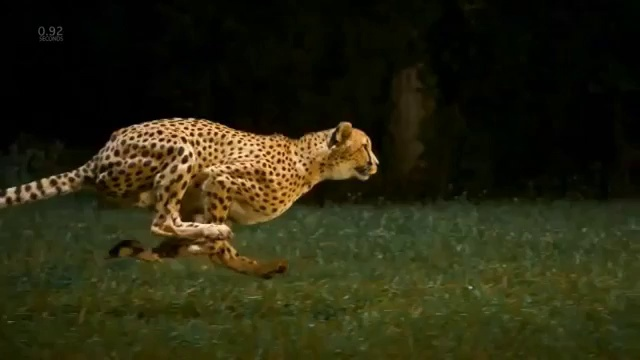

/home/divyanshu_g25/src/GrayscaleVideoColorization/data/cheetah_output/cheetah-Scene-001-01.jpg


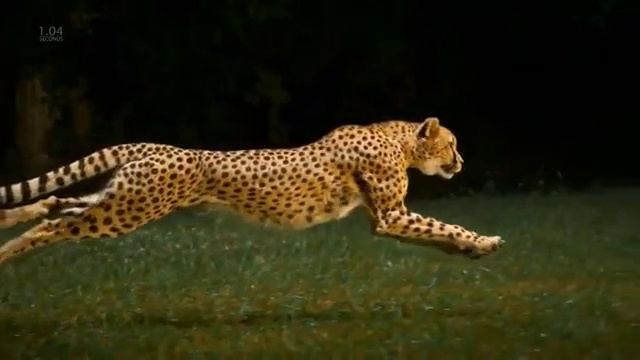

/home/divyanshu_g25/src/GrayscaleVideoColorization/data/cheetah_output/cheetah-Scene-001-02.jpg


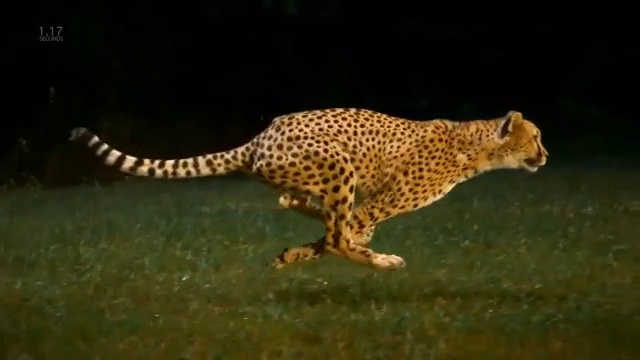

/home/divyanshu_g25/src/GrayscaleVideoColorization/data/cheetah_output/cheetah-Scene-001-03.jpg


In [11]:
image_list = [i for i in glob.glob('/home/divyanshu_g25/src/GrayscaleVideoColorization/data/cheetah_output/*.jpg')]
for imageName in glob.glob('/home/divyanshu_g25/src/GrayscaleVideoColorization/data/cheetah_output/*.jpg'): 
    display(Image(filename=imageName))
    print(imageName)

In [12]:
img = imread(image_list[0])
gray_img = rgb2gray(img)
imsave('/home/divyanshu_g25/src/GrayscaleVideoColorization/data/gray_images/gray-cheetah.jpg', gray_img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [13]:
!python colorization/colorize.py -img_in /home/divyanshu_g25/src/GrayscaleVideoColorization/data/gray_images/gray-cheetah.jpg -img_out /home/divyanshu_g25/src/GrayscaleVideoColorization/data/colored_images/colored-cheetah.jpg

W1021 03:01:07.853543  7521 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W1021 03:01:07.853583  7521 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W1021 03:01:07.853587  7521 _caffe.cpp:142] Net('./models/colorization_deploy_v2.prototxt', 1, weights='./models/colorization_release_v2.caffemodel')
I1021 03:01:07.855958  7521 upgrade_proto.cpp:77] Attempting to upgrade batch norm layers using deprecated params: ./models/colorization_deploy_v2.prototxt
I1021 03:01:07.855978  7521 upgrade_proto.cpp:80] Successfully upgraded batch norm layers using deprecated params.
I1021 03:01:07.856302  7521 net.cpp:51] Initializing net from parameters: 
name: "LtoAB"
state {
  phase: TEST
  level: 0
}
layer {
  name: "data_l"
  type: "Input"
  top: "data_l"
  input_param {
    shape {
      dim: 1
      dim: 1
      dim: 224
      dim: 224
    }
  }
}
layer {
  name: "bw_conv1_1"
  type: "Convolution"
  bottom: "data_l"
  top: "conv1_1"
  convolution_p

I1021 03:01:07.901165  7521 net.cpp:122] Setting up conv6_1
I1021 03:01:07.901185  7521 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:01:07.901187  7521 net.cpp:137] Memory required for data: 92524544
I1021 03:01:07.901193  7521 layer_factory.hpp:77] Creating layer relu6_1
I1021 03:01:07.901201  7521 net.cpp:84] Creating Layer relu6_1
I1021 03:01:07.901209  7521 net.cpp:406] relu6_1 <- conv6_1
I1021 03:01:07.901238  7521 net.cpp:367] relu6_1 -> conv6_1 (in-place)
I1021 03:01:07.901257  7521 net.cpp:122] Setting up relu6_1
I1021 03:01:07.901269  7521 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:01:07.901278  7521 net.cpp:137] Memory required for data: 94130176
I1021 03:01:07.901285  7521 layer_factory.hpp:77] Creating layer conv6_2
I1021 03:01:07.901299  7521 net.cpp:84] Creating Layer conv6_2
I1021 03:01:07.901305  7521 net.cpp:406] conv6_2 <- conv6_1
I1021 03:01:07.901315  7521 net.cpp:380] conv6_2 -> conv6_2
I1021 03:01:07.907012  7521 net.cpp:122] Setting up conv6_2

I1021 03:01:08.031991  7521 upgrade_proto.cpp:77] Attempting to upgrade batch norm layers using deprecated params: ./models/colorization_release_v2.caffemodel
I1021 03:01:08.032042  7521 upgrade_proto.cpp:80] Successfully upgraded batch norm layers using deprecated params.
I1021 03:01:08.032049  7521 net.cpp:744] Ignoring source layer img
I1021 03:01:08.032058  7521 net.cpp:744] Ignoring source layer img_lab
I1021 03:01:08.032061  7521 net.cpp:744] Ignoring source layer img_slice
I1021 03:01:08.032065  7521 net.cpp:744] Ignoring source layer data_l_meansub
I1021 03:01:08.032076  7521 net.cpp:744] Ignoring source layer data_ab_ss
I1021 03:01:08.032083  7521 net.cpp:744] Ignoring source layer data_ab_ss_data_ab_ss_0_split
I1021 03:01:08.032088  7521 net.cpp:744] Ignoring source layer ab_enc
I1021 03:01:08.032094  7521 net.cpp:744] Ignoring source layer gt_ab_313_ab_enc_0_split
I1021 03:01:08.032099  7521 net.cpp:744] Ignoring source layer ab_pb
I1021 03:01:08.032105  7521 net.cpp:744] Ig

In [14]:
!ls ../data/colored_images

colored-cheetah.jpg  colored-hitler.jpg


In [47]:
def getImageName(s):
    tokens = s.split("/")
    n = len(tokens)
    return tokens[n-1]

In [62]:
image_list = [i for i in glob.glob('/home/divyanshu_g25/src/GrayscaleVideoColorization/data/cheetah_output/*.jpg')]
gray_image_list = []
colored_image_list = []

for image in image_list: 
    img = imread(image)
    gray_img = rgb2gray(img)
    imgName = getImageName(image)
    grayImagePath = '/home/divyanshu_g25/src/GrayscaleVideoColorization/data/gray_images/gray_'+imgName
    imsave(grayImagePath, gray_img)
    gray_image_list.append(grayImagePath)
    coloredImagePath = '/home/divyanshu_g25/src/GrayscaleVideoColorization/data/colored_images/colored_' + imgName
    command = 'colorization/colorize.py -img_in ' +  grayImagePath + ' -img_out ' + coloredImagePath
    print(command)
    !python $command
    colored_image_list.append(coloredImagePath)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


colorization/colorize.py -img_in /home/divyanshu_g25/src/GrayscaleVideoColorization/data/gray_images/gray_cheetah-Scene-001-01.jpg -img_out /home/divyanshu_g25/src/GrayscaleVideoColorization/data/colored_images/colored_cheetah-Scene-001-01.jpg
W1021 03:32:21.521971  8487 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W1021 03:32:21.522022  8487 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W1021 03:32:21.522027  8487 _caffe.cpp:142] Net('./models/colorization_deploy_v2.prototxt', 1, weights='./models/colorization_release_v2.caffemodel')
I1021 03:32:21.524453  8487 upgrade_proto.cpp:77] Attempting to upgrade batch norm layers using deprecated params: ./models/colorization_deploy_v2.prototxt
I1021 03:32:21.524480  8487 upgrade_proto.cpp:80] Successfully upgraded batch norm layers using deprecated params.
I1021 03:32:21.524814  8487 net.cpp:51] Initializing net from parameters: 
name: "LtoAB"
state {
  phase: TEST
  level: 0
}
layer {
  n

I1021 03:32:21.529346  8487 net.cpp:84] Creating Layer relu3_2
I1021 03:32:21.529356  8487 net.cpp:406] relu3_2 <- conv3_2
I1021 03:32:21.529361  8487 net.cpp:367] relu3_2 -> conv3_2 (in-place)
I1021 03:32:21.529367  8487 net.cpp:122] Setting up relu3_2
I1021 03:32:21.529374  8487 net.cpp:129] Top shape: 1 256 56 56 (802816)
I1021 03:32:21.529377  8487 net.cpp:137] Memory required for data: 66031616
I1021 03:32:21.529383  8487 layer_factory.hpp:77] Creating layer conv3_3
I1021 03:32:21.529389  8487 net.cpp:84] Creating Layer conv3_3
I1021 03:32:21.529397  8487 net.cpp:406] conv3_3 <- conv3_2
I1021 03:32:21.529403  8487 net.cpp:380] conv3_3 -> conv3_3
I1021 03:32:21.530831  8487 net.cpp:122] Setting up conv3_3
I1021 03:32:21.530856  8487 net.cpp:129] Top shape: 1 256 28 28 (200704)
I1021 03:32:21.530861  8487 net.cpp:137] Memory required for data: 66834432
I1021 03:32:21.530869  8487 layer_factory.hpp:77] Creating layer relu3_3
I1021 03:32:21.530880  8487 net.cpp:84] Creating Layer relu

I1021 03:32:21.583130  8487 net.cpp:122] Setting up conv6_3
I1021 03:32:21.583153  8487 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:21.583159  8487 net.cpp:137] Memory required for data: 98947072
I1021 03:32:21.583168  8487 layer_factory.hpp:77] Creating layer relu6_3
I1021 03:32:21.583178  8487 net.cpp:84] Creating Layer relu6_3
I1021 03:32:21.583184  8487 net.cpp:406] relu6_3 <- conv6_3
I1021 03:32:21.583197  8487 net.cpp:367] relu6_3 -> conv6_3 (in-place)
I1021 03:32:21.583209  8487 net.cpp:122] Setting up relu6_3
I1021 03:32:21.583216  8487 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:21.583221  8487 net.cpp:137] Memory required for data: 100552704
I1021 03:32:21.583226  8487 layer_factory.hpp:77] Creating layer conv6_3norm
I1021 03:32:21.583240  8487 net.cpp:84] Creating Layer conv6_3norm
I1021 03:32:21.583248  8487 net.cpp:406] conv6_3norm <- conv6_3
I1021 03:32:21.583256  8487 net.cpp:380] conv6_3norm -> conv6_3norm
I1021 03:32:21.583283  8487 net.cpp:12

I1021 03:32:21.704468  8487 upgrade_proto.cpp:77] Attempting to upgrade batch norm layers using deprecated params: ./models/colorization_release_v2.caffemodel
I1021 03:32:21.704516  8487 upgrade_proto.cpp:80] Successfully upgraded batch norm layers using deprecated params.
I1021 03:32:21.704525  8487 net.cpp:744] Ignoring source layer img
I1021 03:32:21.704532  8487 net.cpp:744] Ignoring source layer img_lab
I1021 03:32:21.704536  8487 net.cpp:744] Ignoring source layer img_slice
I1021 03:32:21.704541  8487 net.cpp:744] Ignoring source layer data_l_meansub
I1021 03:32:21.704552  8487 net.cpp:744] Ignoring source layer data_ab_ss
I1021 03:32:21.704557  8487 net.cpp:744] Ignoring source layer data_ab_ss_data_ab_ss_0_split
I1021 03:32:21.704563  8487 net.cpp:744] Ignoring source layer ab_enc
I1021 03:32:21.704569  8487 net.cpp:744] Ignoring source layer gt_ab_313_ab_enc_0_split
I1021 03:32:21.704574  8487 net.cpp:744] Ignoring source layer ab_pb
I1021 03:32:21.704579  8487 net.cpp:744] Ig

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


colorization/colorize.py -img_in /home/divyanshu_g25/src/GrayscaleVideoColorization/data/gray_images/gray_cheetah-Scene-001-02.jpg -img_out /home/divyanshu_g25/src/GrayscaleVideoColorization/data/colored_images/colored_cheetah-Scene-001-02.jpg
W1021 03:32:26.226611  8513 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W1021 03:32:26.226657  8513 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W1021 03:32:26.226661  8513 _caffe.cpp:142] Net('./models/colorization_deploy_v2.prototxt', 1, weights='./models/colorization_release_v2.caffemodel')
I1021 03:32:26.229048  8513 upgrade_proto.cpp:77] Attempting to upgrade batch norm layers using deprecated params: ./models/colorization_deploy_v2.prototxt
I1021 03:32:26.229074  8513 upgrade_proto.cpp:80] Successfully upgraded batch norm layers using deprecated params.
I1021 03:32:26.229382  8513 net.cpp:51] Initializing net from parameters: 
name: "LtoAB"
state {
  phase: TEST
  level: 0
}
layer {
  n

I1021 03:32:26.244056  8513 net.cpp:122] Setting up conv4_2
I1021 03:32:26.244073  8513 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:26.244078  8513 net.cpp:137] Memory required for data: 73256960
I1021 03:32:26.244084  8513 layer_factory.hpp:77] Creating layer relu4_2
I1021 03:32:26.244093  8513 net.cpp:84] Creating Layer relu4_2
I1021 03:32:26.244104  8513 net.cpp:406] relu4_2 <- conv4_2
I1021 03:32:26.244109  8513 net.cpp:367] relu4_2 -> conv4_2 (in-place)
I1021 03:32:26.244115  8513 net.cpp:122] Setting up relu4_2
I1021 03:32:26.244119  8513 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:26.244122  8513 net.cpp:137] Memory required for data: 74862592
I1021 03:32:26.244125  8513 layer_factory.hpp:77] Creating layer conv4_3
I1021 03:32:26.244132  8513 net.cpp:84] Creating Layer conv4_3
I1021 03:32:26.244134  8513 net.cpp:406] conv4_3 <- conv4_2
I1021 03:32:26.244141  8513 net.cpp:380] conv4_3 -> conv4_3
I1021 03:32:26.249933  8513 net.cpp:122] Setting up conv4_3

I1021 03:32:26.297286  8513 net.cpp:122] Setting up conv7_2
I1021 03:32:26.297314  8513 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:26.297318  8513 net.cpp:137] Memory required for data: 106975232
I1021 03:32:26.297327  8513 layer_factory.hpp:77] Creating layer relu7_2
I1021 03:32:26.297343  8513 net.cpp:84] Creating Layer relu7_2
I1021 03:32:26.297349  8513 net.cpp:406] relu7_2 <- conv7_2
I1021 03:32:26.297354  8513 net.cpp:367] relu7_2 -> conv7_2 (in-place)
I1021 03:32:26.297363  8513 net.cpp:122] Setting up relu7_2
I1021 03:32:26.297374  8513 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:26.297379  8513 net.cpp:137] Memory required for data: 108580864
I1021 03:32:26.297381  8513 layer_factory.hpp:77] Creating layer conv7_3
I1021 03:32:26.297389  8513 net.cpp:84] Creating Layer conv7_3
I1021 03:32:26.297394  8513 net.cpp:406] conv7_3 <- conv7_2
I1021 03:32:26.297399  8513 net.cpp:380] conv7_3 -> conv7_3
I1021 03:32:26.303102  8513 net.cpp:122] Setting up conv7

I1021 03:32:26.404695  8513 upgrade_proto.cpp:77] Attempting to upgrade batch norm layers using deprecated params: ./models/colorization_release_v2.caffemodel
I1021 03:32:26.404747  8513 upgrade_proto.cpp:80] Successfully upgraded batch norm layers using deprecated params.
I1021 03:32:26.404753  8513 net.cpp:744] Ignoring source layer img
I1021 03:32:26.404759  8513 net.cpp:744] Ignoring source layer img_lab
I1021 03:32:26.404762  8513 net.cpp:744] Ignoring source layer img_slice
I1021 03:32:26.404765  8513 net.cpp:744] Ignoring source layer data_l_meansub
I1021 03:32:26.404768  8513 net.cpp:744] Ignoring source layer data_ab_ss
I1021 03:32:26.404778  8513 net.cpp:744] Ignoring source layer data_ab_ss_data_ab_ss_0_split
I1021 03:32:26.404783  8513 net.cpp:744] Ignoring source layer ab_enc
I1021 03:32:26.404786  8513 net.cpp:744] Ignoring source layer gt_ab_313_ab_enc_0_split
I1021 03:32:26.404790  8513 net.cpp:744] Ignoring source layer ab_pb
I1021 03:32:26.404794  8513 net.cpp:744] Ig

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


colorization/colorize.py -img_in /home/divyanshu_g25/src/GrayscaleVideoColorization/data/gray_images/gray_cheetah-Scene-001-03.jpg -img_out /home/divyanshu_g25/src/GrayscaleVideoColorization/data/colored_images/colored_cheetah-Scene-001-03.jpg
W1021 03:32:30.905591  8538 _caffe.cpp:139] DEPRECATION WARNING - deprecated use of Python interface
W1021 03:32:30.905634  8538 _caffe.cpp:140] Use this instead (with the named "weights" parameter):
W1021 03:32:30.905638  8538 _caffe.cpp:142] Net('./models/colorization_deploy_v2.prototxt', 1, weights='./models/colorization_release_v2.caffemodel')
I1021 03:32:30.908021  8538 upgrade_proto.cpp:77] Attempting to upgrade batch norm layers using deprecated params: ./models/colorization_deploy_v2.prototxt
I1021 03:32:30.908043  8538 upgrade_proto.cpp:80] Successfully upgraded batch norm layers using deprecated params.
I1021 03:32:30.908360  8538 net.cpp:51] Initializing net from parameters: 
name: "LtoAB"
state {
  phase: TEST
  level: 0
}
layer {
  n

I1021 03:32:30.917321  8538 net.cpp:122] Setting up conv4_1
I1021 03:32:30.917342  8538 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:30.917348  8538 net.cpp:137] Memory required for data: 70045696
I1021 03:32:30.917356  8538 layer_factory.hpp:77] Creating layer relu4_1
I1021 03:32:30.917364  8538 net.cpp:84] Creating Layer relu4_1
I1021 03:32:30.917378  8538 net.cpp:406] relu4_1 <- conv4_1
I1021 03:32:30.917394  8538 net.cpp:367] relu4_1 -> conv4_1 (in-place)
I1021 03:32:30.917403  8538 net.cpp:122] Setting up relu4_1
I1021 03:32:30.917412  8538 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:30.917419  8538 net.cpp:137] Memory required for data: 71651328
I1021 03:32:30.917425  8538 layer_factory.hpp:77] Creating layer conv4_2
I1021 03:32:30.917434  8538 net.cpp:84] Creating Layer conv4_2
I1021 03:32:30.917443  8538 net.cpp:406] conv4_2 <- conv4_1
I1021 03:32:30.917450  8538 net.cpp:380] conv4_2 -> conv4_2
I1021 03:32:30.923218  8538 net.cpp:122] Setting up conv4_2

I1021 03:32:30.970044  8538 net.cpp:122] Setting up conv7_1
I1021 03:32:30.970068  8538 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:30.970074  8538 net.cpp:137] Memory required for data: 103763968
I1021 03:32:30.970083  8538 layer_factory.hpp:77] Creating layer relu7_1
I1021 03:32:30.970094  8538 net.cpp:84] Creating Layer relu7_1
I1021 03:32:30.970101  8538 net.cpp:406] relu7_1 <- conv7_1
I1021 03:32:30.970109  8538 net.cpp:367] relu7_1 -> conv7_1 (in-place)
I1021 03:32:30.970118  8538 net.cpp:122] Setting up relu7_1
I1021 03:32:30.970129  8538 net.cpp:129] Top shape: 1 512 28 28 (401408)
I1021 03:32:30.970134  8538 net.cpp:137] Memory required for data: 105369600
I1021 03:32:30.970139  8538 layer_factory.hpp:77] Creating layer conv7_2
I1021 03:32:30.970149  8538 net.cpp:84] Creating Layer conv7_2
I1021 03:32:30.970157  8538 net.cpp:406] conv7_2 <- conv7_1
I1021 03:32:30.970165  8538 net.cpp:380] conv7_2 -> conv7_2
I1021 03:32:30.975844  8538 net.cpp:122] Setting up conv7

I1021 03:32:31.082629  8538 upgrade_proto.cpp:77] Attempting to upgrade batch norm layers using deprecated params: ./models/colorization_release_v2.caffemodel
I1021 03:32:31.082676  8538 upgrade_proto.cpp:80] Successfully upgraded batch norm layers using deprecated params.
I1021 03:32:31.082684  8538 net.cpp:744] Ignoring source layer img
I1021 03:32:31.082690  8538 net.cpp:744] Ignoring source layer img_lab
I1021 03:32:31.082695  8538 net.cpp:744] Ignoring source layer img_slice
I1021 03:32:31.082700  8538 net.cpp:744] Ignoring source layer data_l_meansub
I1021 03:32:31.082711  8538 net.cpp:744] Ignoring source layer data_ab_ss
I1021 03:32:31.082737  8538 net.cpp:744] Ignoring source layer data_ab_ss_data_ab_ss_0_split
I1021 03:32:31.082743  8538 net.cpp:744] Ignoring source layer ab_enc
I1021 03:32:31.082756  8538 net.cpp:744] Ignoring source layer gt_ab_313_ab_enc_0_split
I1021 03:32:31.082763  8538 net.cpp:744] Ignoring source layer ab_pb
I1021 03:32:31.082770  8538 net.cpp:744] Ig

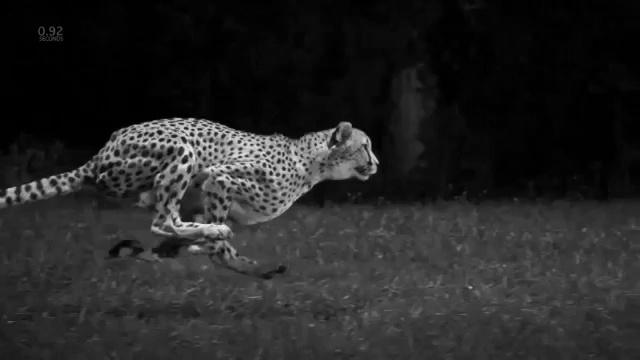

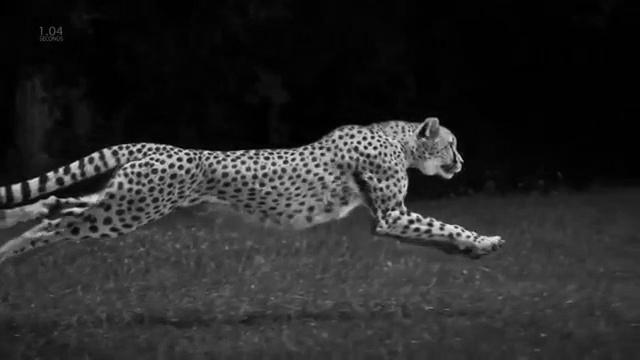

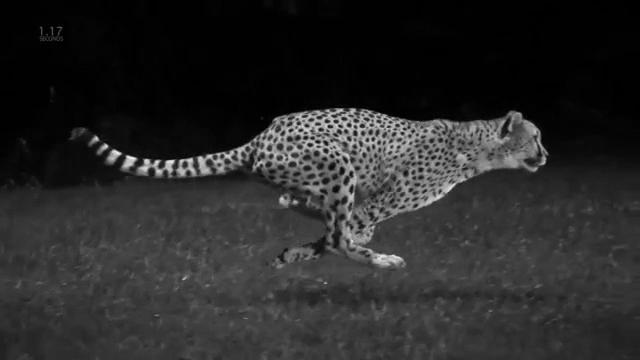

In [63]:
for g in gray_image_list:
    display(Image(filename= g))

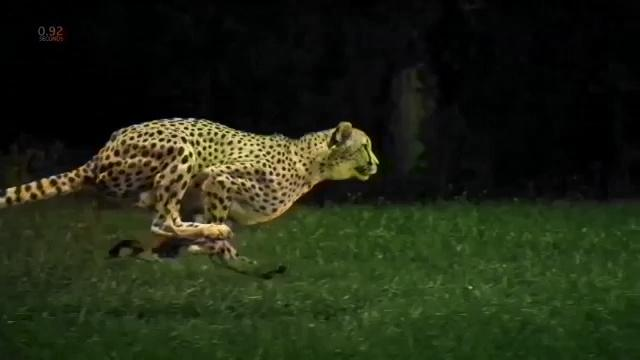

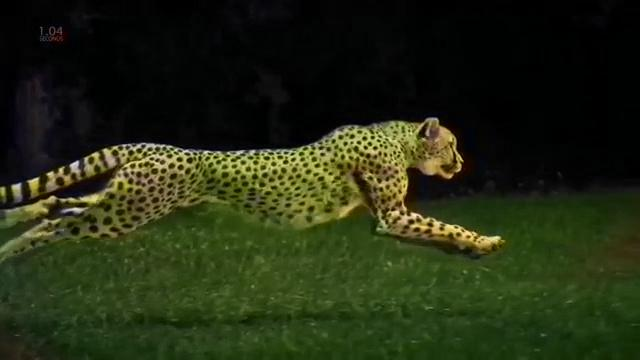

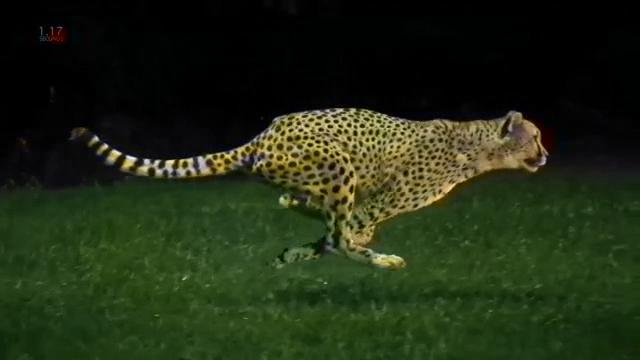

In [64]:
for c in colored_image_list:
    display(Image(filename= c))

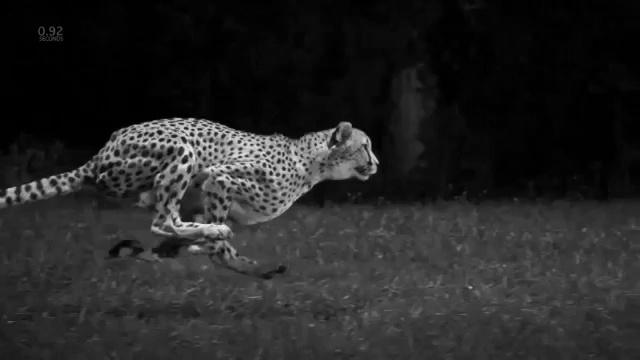

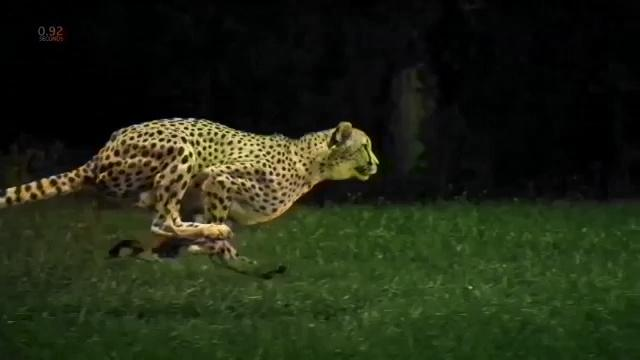

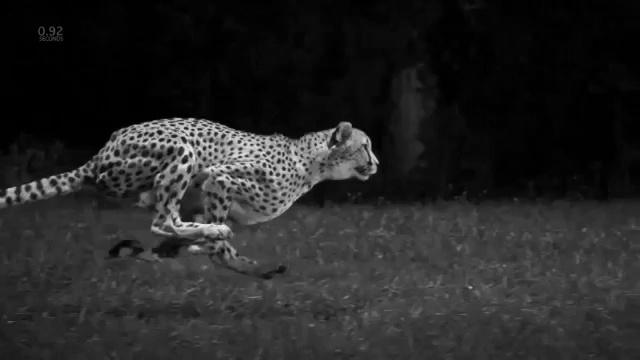

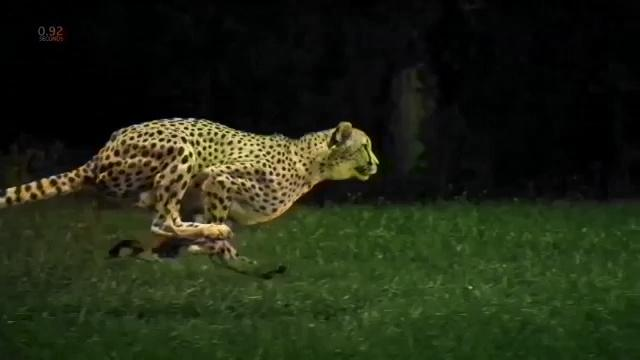

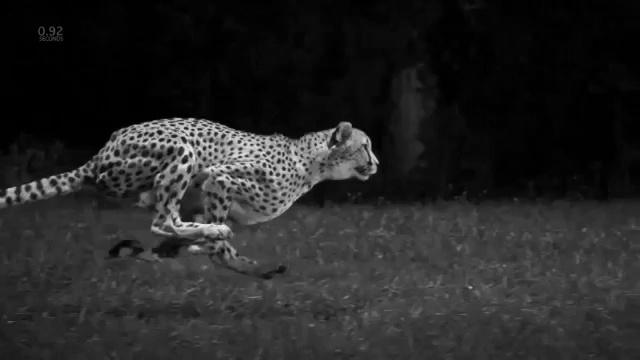

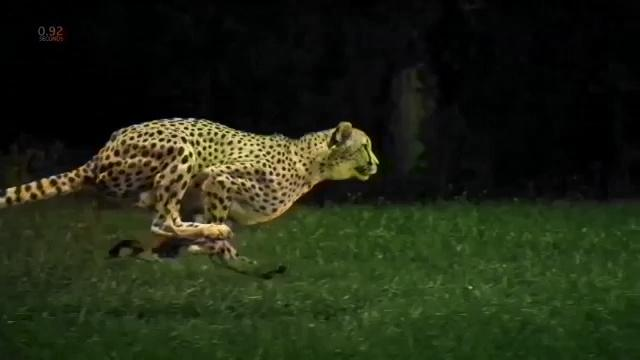

In [66]:
for i in range(len(gray_image_list)):
    display(Image(filename= gray_image_list[0]))
    display(Image(filename= colored_image_list[0]))